In [317]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#To show all rows and column
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

#to show data in number form instead of scientific form 
pd.set_option('display.float_format', '{:.2f}'.format)

In [319]:
# 2. Load Data
df = pd.read_csv("loan.csv")

# Display basic information
df.shape


(39717, 111)

In [285]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [286]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

 # 1. Data understanding

In [287]:
# Check for missing values
print("****Missing Values:****")
print(df.isnull().sum())



****Missing Values:****
id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti             

**Data Quality Issue 1**: Many columns have records where many/all values are null (as shown in the response to the above command)

In [288]:
# Check for duplicates
print("****Duplicate Rows:****")
print(df.duplicated().sum())

****Duplicate Rows:****
0


In [289]:
#Check the datatypes
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

**Data Quality Issue 2**: Date columns are of object data type and need to be converted to datetime objects, e.g., issue_d.

In [290]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


**Data Quality Issue 3**: There are some percentage columns that are currently objects but need to be processed to convert them into numbers. for eg., int_rate 

# Variable descriptions 
Some **Numeric Columns**  are not included as all the records have null values for them 

| **Numeric Columns**              | **Simple Explanation**                                                                                                      |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **acc_now_delinq**             | Number of accounts where the borrower is currently delinquent (past due).                                                     |
| **acc_open_past_24mths**       | Number of accounts opened in the last 24 months.                                                                              |
| **all_util**                   | Ratio of total balance to the credit limit on all trades.                                                                     |
| **annual_inc**                 | The borrower’s reported annual income during loan application.                                                                |
| **annual_inc_joint**           | The combined annual income of the borrower and co-borrowers during loan application.                                           |
| **avg_cur_bal**                | The average balance of all the borrower’s accounts.                                                                           |
| **bc_open_to_buy**             | The total available credit limit on all revolving bankcards.                                                                  |
| **bc_util**                    | The ratio of current balance to the credit limit on all bankcard accounts.                                                    |
| **chargeoff_within_12_mths**   | Number of charge-offs (loan amounts considered uncollectible) in the past 12 months.                                         |
| **collections_12_mths_ex_med** | Number of non-medical collections reported in the last 12 months.                                                             |
| **delinq_2yrs**                | Number of delinquent incidents (30+ days past due) in the last 2 years.                                                       |
| **dti**                        | Debt-to-income ratio: Monthly debt payments divided by monthly income.                                                        |
| **dti_joint**                  | Co-borrower debt-to-income ratio: Co-borrower's monthly debt payments divided by monthly income.                              |
| **fico_range_high**            | The highest value of the FICO score range at the time of loan origination.                                                     |
| **fico_range_low**             | The lowest value of the FICO score range at the time of loan origination.                                                      |
| **funded_amnt**                | The total amount of money funded to the loan at the time.                                                                     |
| **loan_amnt**                  | The amount of money the borrower applied for, which was either approved or adjusted.                                          |
| **installment**                | The monthly installment payment that the borrower is expected to pay for the loan.                                            |
| **int_rate**                   | The interest rate on the loan.                                                                                                |
| **max_bal_bc**                 | Maximum balance on any revolving account.                                                                                    |
| **num_accts_ever_120_pd**      | Number of accounts that have ever been 120 or more days past due.                                                              |
| **num_rev_accts**              | Number of revolving credit accounts (e.g., credit cards) held by the borrower.                                                |
| **open_acc**                   | Number of open credit lines in the borrower's credit file.                                                                    |
| **open_rv_12m**                | Number of revolving trade accounts opened in the last 12 months.                                                              |
| **revol_bal**                  | Total balance of revolving credit accounts (e.g., credit cards).                                                              |
| **revol_util**                 | The ratio of total revolving credit balance to total available revolving credit.                                              |
| **total_acc**                  | Total number of credit lines currently in the borrower’s credit history.                                                      |
| **total_bal_ex_mort**          | Total credit balance excluding mortgage balances.                                                                            |
| **total_bc_limit**             | Total credit limit across all bankcard accounts.                                                                              |
| **total_pymnt**                | Total amount of payments received for the loan to date.                                                                       |
| **total_pymnt_inv**            | Total amount of payments received by investors for the loan to date.                                                          |
| **total_rec_int**              | Total interest amount received from the borrower to date.                                                                     |
| **total_rec_late_fee**         | Total amount of late fees received from the borrower.                                                                         |
| **total_rec_prncp**            | Total principal amount received from the borrower to date.                                                                   |
| **total_rev_hi_lim**           | Total revolving credit high limit across all accounts.                                                                        |


| **Object Columns**              | **Simple Explanation**                                                                                                      |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **addr_state**                | The state where the borrower lives, as provided in the loan application.                                                      |
| **application_type**          | Whether the loan is an individual application or a joint application with co-borrowers.                                       |
| **desc**                      | The loan description provided by the borrower during loan application.                                                        |
| **emp_title**                 | The job title or position of the borrower as specified in the loan application.                                                |
| **grade**                     | The loan grade assigned by the platform based on the borrower's creditworthiness.                                             |
| **home_ownership**            | The borrower’s home ownership status: RENT, OWN, MORTGAGE, or OTHER.                                                          |
| **id**                        | A unique identifier assigned to each loan listing.                                                                            |
| **initial_list_status**       | The initial listing status of the loan, either "W" for withdrawn or "F" for funded.                                          |
| **issue_d**                   | The month in which the loan was issued.                                                                                       |
| **last_credit_pull_d**        | The date when the borrower’s credit report was last reviewed by the platform.                                                |
| **loan_status**               | The current status of the loan: whether it is 'Fully Paid', 'Charged Off', or 'Current'.                                      |
| **member_id**                 | A unique identifier for the borrower member on the platform.                                                                  |
| **policy_code**               | A code indicating whether the loan is publicly available (1) or a new product (2).                                           |
| **purpose**                   | The purpose for which the borrower is requesting the loan, e.g., debt consolidation, home improvement, etc.                   |
| **pymnt_plan**                | Indicates whether a payment plan has been set for the loan: True or False.                                                   |
| **sub_grade**                 | A finer categorization of the loan grade, assigned based on the borrower’s creditworthiness.                                 |
| **title**                     | The title or name of the loan as provided by the borrower during the application.                                            |
| **verification_status**       | Indicates whether the borrower’s income was verified (Verified, Not Verified).                                               |
| **zip_code**                  | The first three digits of the borrower's zip code, as provided in the loan application.                                       |


| **Date Columns**       | **Simple Explanation**                                                                                     |
|------------------------|----------------------------------------------------------------------------------------------------------|
| **issue_d**            | The date when the loan was issued or funded to the borrower.                                             |
| **earliest_cr_line**   | The earliest date recorded for the borrower's credit line in their credit history.                       |
| **last_pymnt_d**       | The date when the last payment was made by the borrower on the loan.                                     |
| **next_pymnt_d**       | The upcoming date for the borrower's next payment (if applicable).                                       |
| **last_credit_pull_d** | The most recent date when the borrower's credit report was reviewed or pulled for verification purposes. |




# 2. Data Cleaning and Manipulation


**Data Quality Issue 1 fix**: Many columns have records where many/all values are null (as shown in the response to the above command)
df.dtypes

In [291]:
# Handle missing values
df_updated=df.dropna(axis=1, how="all")
df_updated.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


**Data Quality Issue 2 fix**: Date columns are of object data type and need to be converted to datetime objects, e.g., issue_d.

In [292]:
df_updated['earliest_cr_line'] =pd.to_datetime(df_updated['earliest_cr_line'], format='%b-%y')
df_updated['last_pymnt_d'] =pd.to_datetime(df_updated['last_pymnt_d'], format='%b-%y')
df_updated['next_pymnt_d'] =pd.to_datetime(df_updated['next_pymnt_d'], format='%b-%y')
df_updated['last_credit_pull_d'] =pd.to_datetime(df_updated['last_credit_pull_d'], format='%b-%y')
df_updated['issue_d'] =pd.to_datetime(df_updated['issue_d'], format='%b-%y')

In [293]:
df_updated.dtypes



id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                              object
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
url                                   object
desc                                  object
purpose                               object
title                                 object
zip_code  

**Data Quality Issue 3 fix**: There are some percentage columns that are currently objects but need to be processed to convert them into numbers. for eg., int_rate 

In [294]:
df_updated["int_rate"]=df_updated["int_rate"].str.rstrip('%').astype(float)
df_updated["revol_util"]=df_updated["revol_util"].str.rstrip('%').astype(float)
df_updated["term"]=df_updated["term"].str.rstrip(' months').astype(int)

**Data Quality Issue 4**: Check numerical columns to see if all records are unique (e.g., ID columns) or if all records have very low variance. Such columns may not contribute much.

In [295]:
df_num = df_updated.select_dtypes(include="number")
desc=df_num.describe()
unique_values=df_num.nunique()
desc.loc['unique']=unique_values
desc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39667.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,39717.00,39717.00,39661.00,39717.00,39020.00,39678.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,42.42,12.02,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,48.83,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,210694.13,265678.31,7456.67,7187.24,7128.45,10.62,3.72,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,28.33,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,54734.00,70699.00,500.00,500.00,0.00,36.00,5.42,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,36.00,9.25,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,25.40,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,36.00,11.86,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,49.30,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,60.00,14.59,430.78,82300.00,18.60,0.00,1.00,52.00,104.00,12.00,0.00,17058.00,72.40,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,60.00,24.59,1305.19,6000000.00,29.99,11.00,8.00,120.00,129.00,44.00,4.00,149588.00,99.90,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00
unique,39717.00,39717.00,885.00,1041.00,8205.00,2.00,371.00,15383.00,5318.00,2868.00,11.00,9.00,95.00,111.00,40.00,5.00,21711.00,1089.00,82.00,1137.00,1138.00,37850.00,37518.00,7976.00,35148.00,1356.00,4040.00,2616.00,34930.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00


**Data Quality Issue 4 fix**: From above information, we can see columns **tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, policy_code, collections_12_mths_ex_med** have single unique value (**low variance**) so they can be dropped. Other side, for column **id, member_id** , each row has unique value(**high variance**) as they are identifier values so they can also be **dropped**

In [296]:
df_num=df_num.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med','id','member_id'],axis=1)

In [297]:
df_num.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
pub_rec_bankruptcies         697
dtype: int64

**Data Quality Issue 5 fix** - mths_since_last_delinq, mths_since_last_record as most of the values are null  

In [298]:
df_num=df_num.drop(['mths_since_last_delinq', 'mths_since_last_record'],axis=1)


In [299]:
df_num.shape

(39717, 26)

In [300]:
# Identify outliers using IQR
for col in df_num:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} Outliers:", ((df_num[col] < (Q1 - 1.5 * IQR)) | (df_num[col] > (Q3 + 1.5 * IQR))).sum())

loan_amnt Outliers: 1230
funded_amnt Outliers: 1038
funded_amnt_inv Outliers: 1000
term Outliers: 0
int_rate Outliers: 78
installment Outliers: 1245
annual_inc Outliers: 1843
dti Outliers: 0
delinq_2yrs Outliers: 4312
inq_last_6mths Outliers: 3634
open_acc Outliers: 515
pub_rec Outliers: 2116
revol_bal Outliers: 2497
revol_util Outliers: 0
total_acc Outliers: 525
out_prncp Outliers: 1140
out_prncp_inv Outliers: 1140
total_pymnt Outliers: 1334
total_pymnt_inv Outliers: 1441
total_rec_prncp Outliers: 972
total_rec_int Outliers: 3157
total_rec_late_fee Outliers: 2046
recoveries Outliers: 4218
collection_recovery_fee Outliers: 3782
last_pymnt_amnt Outliers: 4286
pub_rec_bankruptcies Outliers: 1681


**Analysis** : After cleaning we still have 28 numeric , 5 datetime and 16 object columns

In [301]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int64         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

In [302]:


# Step 1: Detecting outliers using IQR for each column
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Capping outliers in a separate dataframe
df_capped = df_num.copy()  # Keep original intact
for col in df_num.columns:
    df_capped[col] = np.clip(df_num[col], lower_bound[col], upper_bound[col])  # Apply capping

# Step 3: Identify and capture the rows where capping happened
capped_rows = df_capped != df_num

# Step 4: Create a DataFrame with original and capped columns side by side
comparison = pd.concat([df_num.add_suffix('_original'), df_capped.add_suffix('_capped')], axis=1)

# Step 5: Filter the rows where capping occurred (values are different from original)
comparison_filtered = comparison[capped_rows.any(axis=1)]  # Filter rows where any column value is different
column_order = []
for col in df_num.columns:
    column_order.append(f'{col}_original')
    column_order.append(f'{col}_capped')
comparison_filtered = comparison_filtered[column_order]

# Display the result (first few rows)
print("Rows with Capped Values (Original and Capped Columns):")
from IPython.display import display
display(comparison_filtered.head())

Rows with Capped Values (Original and Capped Columns):


,loan_amnt_original,loan_amnt_capped,funded_amnt_original,funded_amnt_capped,funded_amnt_inv_original,funded_amnt_inv_capped,term_original,term_capped,int_rate_original,int_rate_capped,installment_original,installment_capped,annual_inc_original,annual_inc_capped,dti_original,dti_capped,delinq_2yrs_original,delinq_2yrs_capped,inq_last_6mths_original,inq_last_6mths_capped,open_acc_original,open_acc_capped,pub_rec_original,pub_rec_capped,revol_bal_original,revol_bal_capped,revol_util_original,revol_util_capped,total_acc_original,total_acc_capped,out_prncp_original,out_prncp_capped,out_prncp_inv_original,out_prncp_inv_capped,total_pymnt_original,total_pymnt_capped,total_pymnt_inv_original,total_pymnt_inv_capped,total_rec_prncp_original,total_rec_prncp_capped,total_rec_int_original,total_rec_int_capped,total_rec_late_fee_original,total_rec_late_fee_capped,recoveries_original,recoveries_capped,collection_recovery_fee_original,collection_recovery_fee_capped,last_pymnt_amnt_original,last_pymnt_amnt_capped,pub_rec_bankruptcies_original,pub_rec_bankruptcies_capped
1,2500,2500,2500,2500,2500.00,2500.00,60,60,15.27,15.27,59.83,59.83,30000.00,30000.00,1.00,1.00,0,0,5,2.50,3,3,0,0,1687,1687.00,9.40,9.40,4,4,0.00,0.00,0.00,0.00,1008.71,1008.71,1008.71,1008.71,456.46,456.46,435.17,435.17,0.00,0.00,117.08,0.00,1.11,0.00,119.66,119.66,0.00,0.00
3,10000,10000,10000,10000,10000.00,10000.00,36,36,13.49,13.49,339.31,339.31,49200.00,49200.00,20.00,20.00,0,0,1,1.00,10,10,0,0,5598,5598.00,21.00,21.00,37,37,0.00,0.00,0.00,0.00,12231.89,12231.89,12231.89,12231.89,10000.00,10000.00,2214.92,2214.92,16.97,0.00,0.00,0.00,0.00,0.00,357.48,357.48,0.00,0.00
4,3000,3000,3000,3000,3000.00,3000.00,60,60,12.69,12.69,67.79,67.79,80000.00,80000.00,17.94,17.94,0,0,0,0.00,15,15,0,0,27783,27783.00,53.90,53.90,38,38,524.06,0.00,524.06,0.00,3513.33,3513.33,3513.33,3513.33,2475.94,2475.94,1037.39,1037.39,0.00,0.00,0.00,0.00,0.00,0.00,67.79,67.79,0.00,0.00
5,5000,5000,5000,5000,5000.00,5000.00,36,36,7.90,7.90,156.46,156.46,36000.00,36000.00,11.20,11.20,0,0,3,2.50,9,9,0,0,7963,7963.00,28.30,28.30,12,12,0.00,0.00,0.00,0.00,5632.21,5632.21,5632.21,5632.21,5000.00,5000.00,632.21,632.21,0.00,0.00,0.00,0.00,0.00,0.00,161.03,161.03,0.00,0.00
8,5600,5600,5600,5600,5600.00,5600.00,60,60,21.28,21.28,152.39,152.39,40000.00,40000.00,5.55,5.55,0,0,2,2.00,11,11,0,0,5210,5210.00,32.60,32.60,13,13,0.00,0.00,0.00,0.00,646.02,646.02,646.02,646.02,162.02,162.02,294.94,294.94,0.00,0.00,189.06,0.00,2.09,0.00,152.39,152.39,0.00,0.00


In [303]:


# Derived features
df_num['issue_year']=df_updated['issue_d'].dt.year  
df_num["loan_status_num"]=df_updated["loan_status"].map({'Charged Off':0,'Current':1,'Fully Paid':1})

In [304]:
df_updated['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [305]:

# Function to convert 'emp_length' to numeric
def process_emp_length(emp_length):
    if pd.isna(emp_length):  # Check if value is NaN
        return np.nan  
    elif '10+ years' in emp_length:
        return 10 
    elif '< 1 year' in emp_length:
        return 0  
    elif ' year' in emp_length:  
        return int(emp_length.split(' ')[0]) 
    else:
        return np.nan  

df_updated['emp_length_num'] = df_updated['emp_length'].apply(process_emp_length)

df_updated['emp_length_num'] = df_updated['emp_length_num'].astype('Int64') 
df_updated.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_num
0,1077501,1296599,5000,5000,4975.00,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00,10
1,1077430,1314167,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.40,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00,0


# 3. Data Analysis: Univariate analysis. I am considering below columns for this job

| Variable Name               | Data Type | Reason for Impact on Loan Default Status                                                                                              |
|-----------------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------------|
| **loan_amnt**                | Numeric   | Total loan amount requested can indicate the borrower's financial commitment and may correlate with the likelihood of default.       |
| **dti**                      | Numeric   | Debt-to-income ratio shows the borrower's ability to repay based on current debts relative to income, a strong predictor of default.   |
| **int_rate**           | Numeric   | The interest rate on the loan. Higher interest rates might indicate higher credit risk and therefore a greater likelihood of default.                  |
| **issue_year (Derived column)**   | Numeric   | The year when the loan was issued. Loans issued during economic downturns (e.g., 2008–2009) may have a higher default rate.                         |
| **home_ownership**           | Object    | Whether the borrower owns a home can impact default risk, as homeowners may have more financial stability than renters.                |
| **emp_length_num(Derived column)**               | Numeric   | Employment length indicates job stability, which can influence the ability to repay loans and avoid default.                         |                                                                                                               | **revol_util**               | Numeric   | Revolving line utilization rate (credit card usage). Higher utilization rates could indicate financial stress and increase the risk of default.                  |
          


In [306]:
#concatenating numeric and object columns for analysis
df1_univariate=df_num[["loan_amnt","dti","int_rate","revol_util"]]
df2_univariate=df_updated[["home_ownership","emp_length_num"]]
df_univariate=pd.concat([df1_univariate,df2_univariate],axis=1)
df1_univariate.isnull().sum()

loan_amnt      0
dti            0
int_rate       0
revol_util    50
dtype: int64

In [307]:
df_updated.dtypes
df_updated.shape

(39717, 58)


Analyzing Column: loan_amnt

### Analysis for Numeric Column: loan_amnt ###
count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


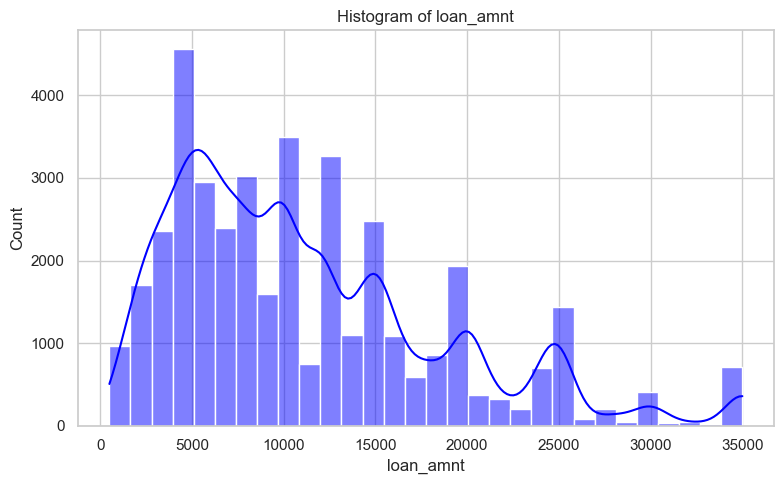

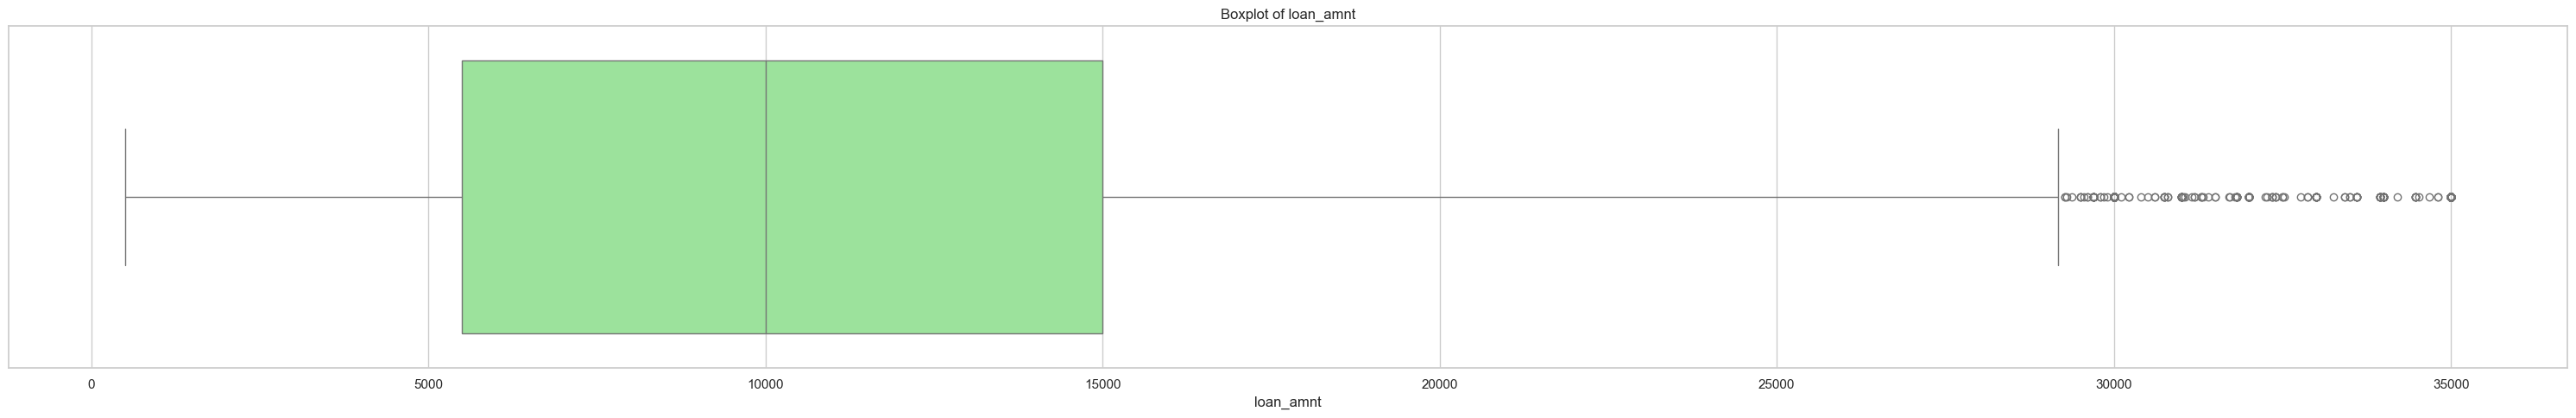


Analyzing Column: dti

### Analysis for Numeric Column: dti ###
count   39717.00
mean       13.32
std         6.68
min         0.00
25%         8.17
50%        13.40
75%        18.60
max        29.99
Name: dti, dtype: float64


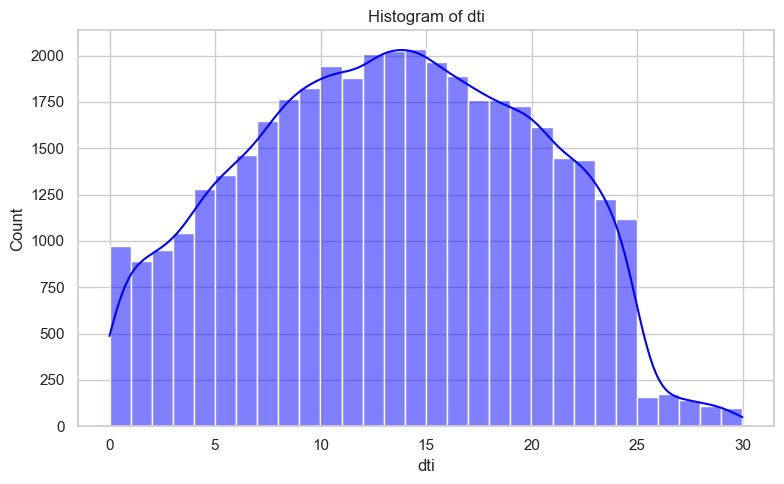

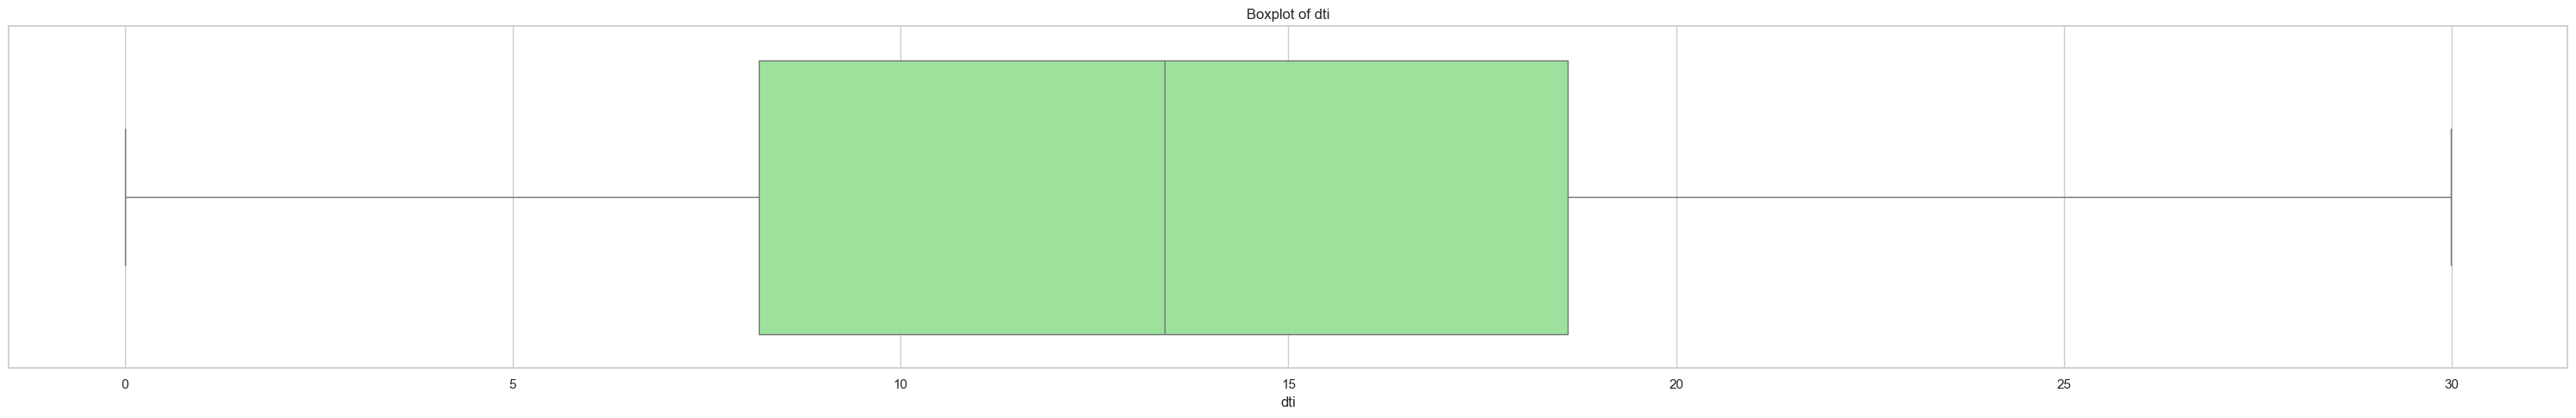


Analyzing Column: int_rate

### Analysis for Numeric Column: int_rate ###
count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object


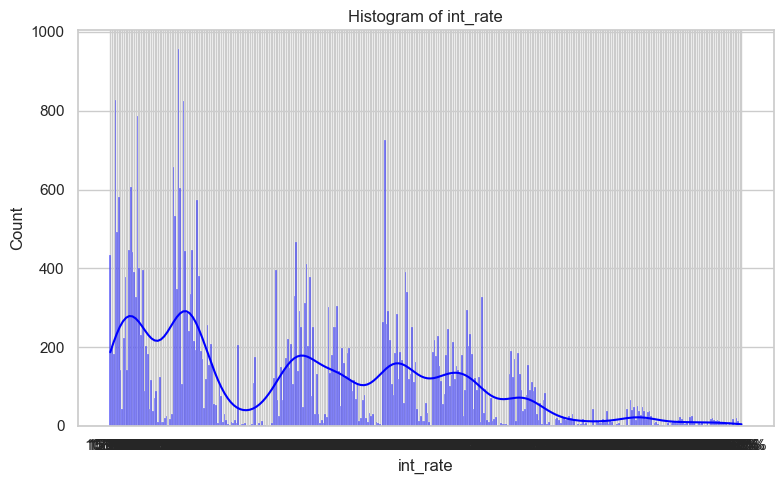

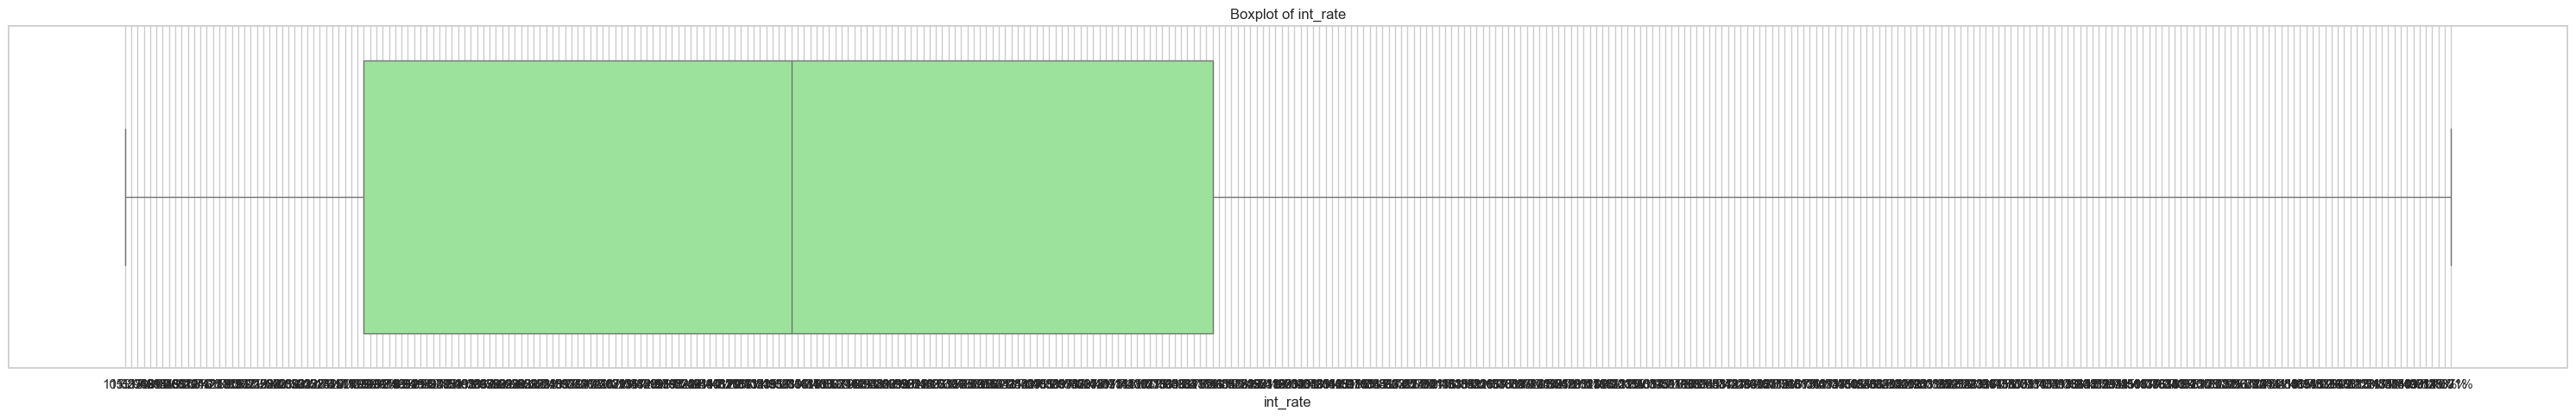


Analyzing Column: revol_util

### Analysis for Numeric Column: revol_util ###
count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object


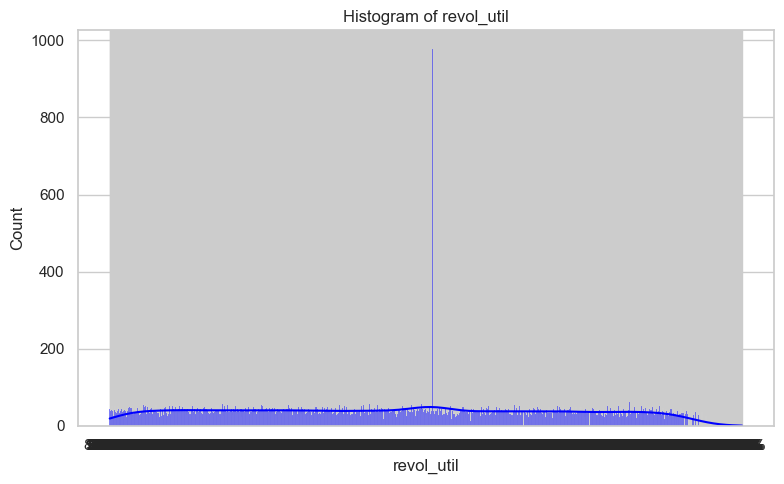

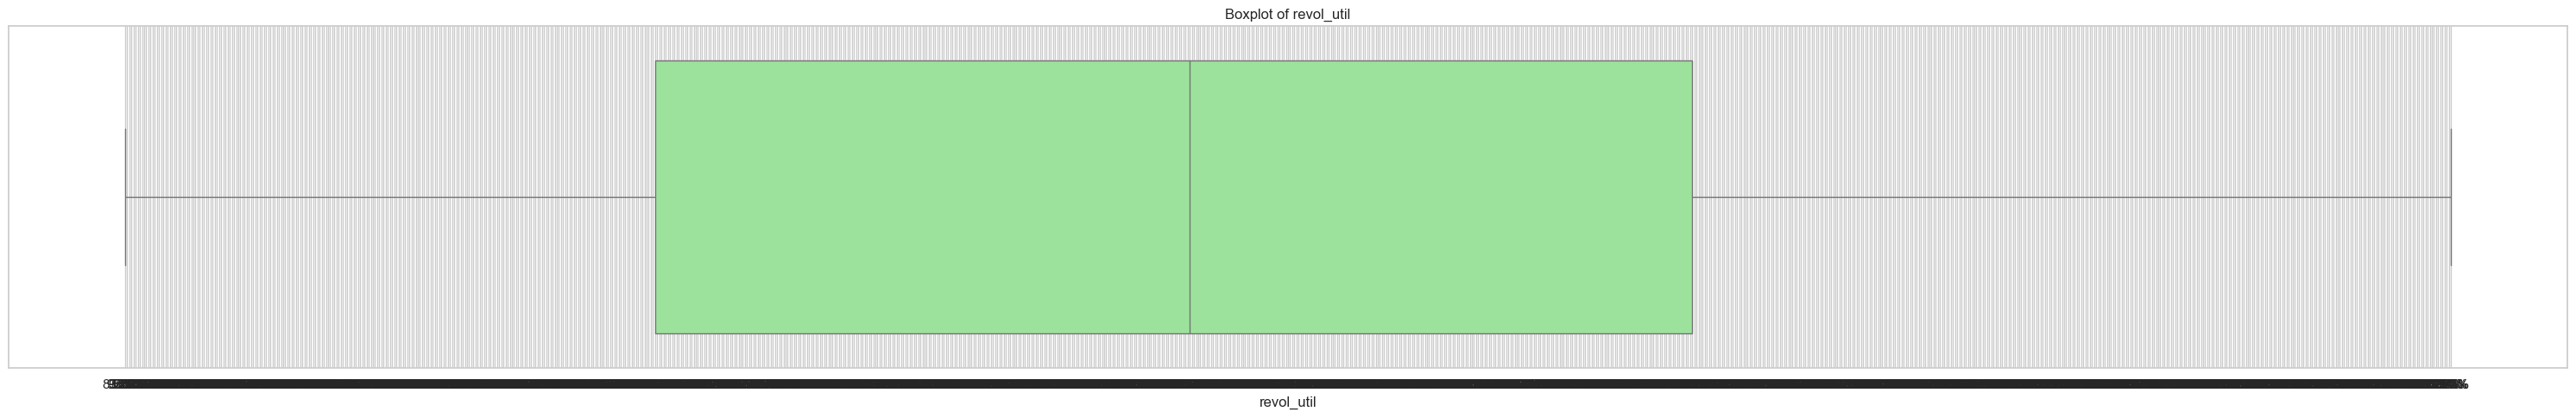


Analyzing Column: home_ownership

### Analysis for Categorical Column: home_ownership ###
home_ownership
RENT       47.58
MORTGAGE   44.46
OWN         7.70
OTHER       0.25
NONE        0.01
Name: proportion, dtype: float64


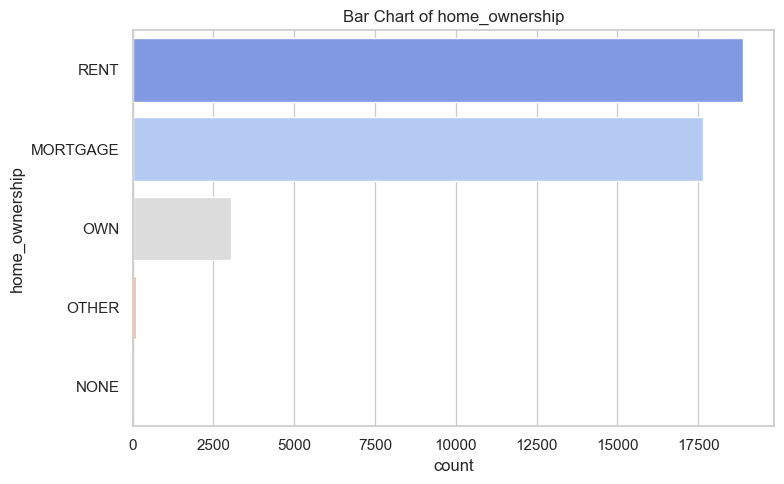


Analyzing Column: emp_length_num

### Analysis for Numeric Column: emp_length_num ###
Error analyzing numeric column emp_length_num: 'emp_length_num'


In [308]:

def analyze_numeric(column):
    """Univariate analysis for numeric columns."""
    print(f"\n### Analysis for Numeric Column: {column} ###")
    print(df[column].describe())
   
    plt.figure(figsize=(8,5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(30, 5))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()


def analyze_categorical(column):
    """Univariate analysis for categorical columns."""
    print(f"\n### Analysis for Categorical Column: {column} ###")
    print(df[column].value_counts(normalize=True) * 100)  # Frequency percentage
    
    # Plot: Bar Chart
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette='coolwarm')
    plt.title(f"Bar Chart of {column}")
    plt.tight_layout()
    plt.show()

def univariate_analysis(df):
    for column in df.columns:
        print(f"\nAnalyzing Column: {column}")
        
        if pd.api.types.is_numeric_dtype(df[column]):
            try:
                analyze_numeric(column)
            except Exception as e:
                print(f"Error analyzing numeric column {column}: {e}")
        
        elif pd.api.types.is_object_dtype(df[column]):
            try:
                analyze_categorical(column)
            except Exception as e:
                print(f"Error analyzing categorical column {column}: {e}")
        else:
            print(f"Skipping column {column}: Unsupported data type or mixed types.")

univariate_analysis(df_univariate)

# 3. Data Analysis: Bivariate analysis

In [309]:
# Reset the index of each DataFrame to avoid duplicate indices when concatenating
df_num_reset = df_num.reset_index(drop=True)
df_object_reset = df_updated.select_dtypes('object').reset_index(drop=True)
df_datetime_reset = df_updated.select_dtypes('datetime').reset_index(drop=True)

# Concatenate along axis=1 (horizontally) to avoid default concatenation(axis=0)
df_combined = pd.concat([df_num_reset, df_object_reset, df_datetime_reset], axis=1)

df_combined.shape


(39717, 49)

# Bivariate analysis: issue_year v/s loan_status_num

In [310]:
default_rate_by_year = df_combined.groupby('issue_year')['loan_status_num'].mean().reset_index()
default_rate_by_year.rename(columns={'loan_status_num': 'default_rate'}, inplace=True)
print(default_rate_by_year)

   issue_year  default_rate
0        2007          0.82
1        2008          0.84
2        2009          0.87
3        2010          0.87
4        2011          0.85


**Derived Metric**: The default_rate is calculated by aggregating the drived feature (loan_status_num) over the issue_year group.

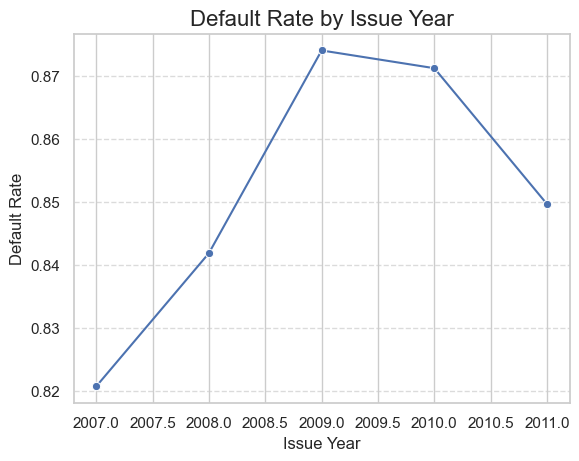

In [311]:
sns.lineplot(data=default_rate_by_year, x='issue_year',y='default_rate',marker='o')
plt.title('Default Rate by Issue Year', fontsize=16)
plt.xlabel('Issue Year', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **Issue Year (issue_year) vs Default Rate**
  - **Observation**: Default rates were higher in the years following the 2008 financial crisis (2009). Over time, default rates seem to fluctuate based on broader economic conditions.
  - **Insight**: Economic factors, such as a recession, can significantly impact a customer's ability to repay loans. The issue year can help identify external events affecting the likelihood of default, suggesting that customers who took loans during downturn periods may have a higher risk of default.


# Segmented Bivariate analysis: loan_amnt v/s loan_status


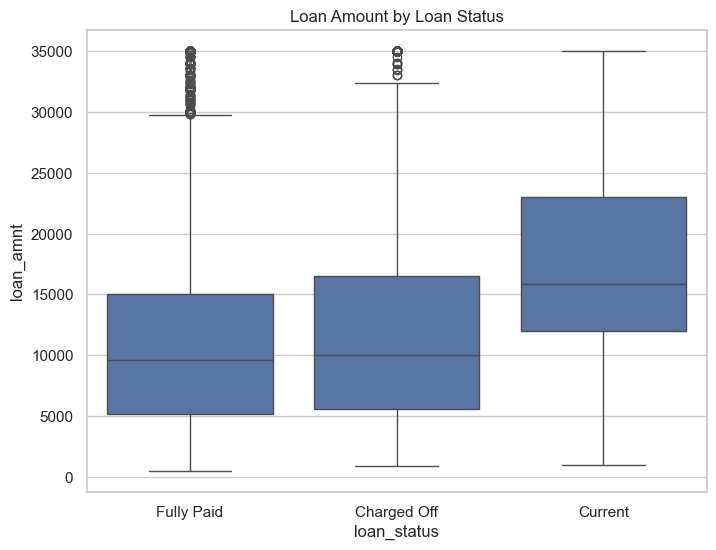

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: 'loan_status' (categorical) vs 'loan_amnt' (numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_combined)
plt.title('Loan Amount by Loan Status')
plt.show()


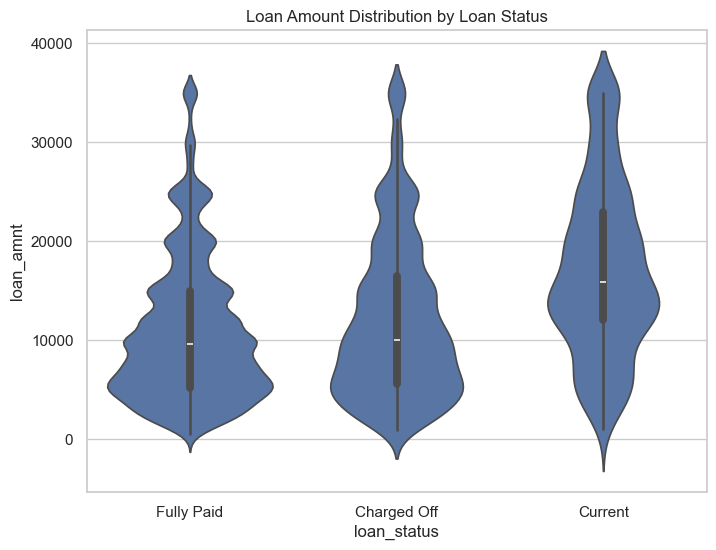

In [313]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='loan_status', y='loan_amnt', data=df_combined)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

- **Loan Amount vs Loan Status**
  - **Observation**: Larger loan amounts are more likely to be associated with loan defaults (Charged Off). Borrowers with smaller loan amounts tend to have higher rates of being fully paid.
  - **Insight**: Higher loan amounts can indicate a greater financial burden, increasing the likelihood of default, as larger loans are harder to repay. It suggests that customers with large loans could be at a higher risk of default.


# Bivariate analysis: purpose v/s loan_status

In [314]:
# Create the cross-tabulation
cross_tab = pd.crosstab(df_combined['purpose'], df_combined['loan_status'], margins=True, margins_name="Total")

print(cross_tab)

loan_status         Charged Off  Current  Fully Paid  Total
purpose                                                    
car                         160       50        1339   1549
credit_card                 542      103        4485   5130
debt_consolidation         2767      586       15288  18641
educational                  56        0         269    325
home_improvement            347      101        2528   2976
house                        59       14         308    381
major_purchase              222       37        1928   2187
medical                     106       12         575    693
moving                       92        7         484    583
other                       633      128        3232   3993
renewable_energy             19        1          83    103
small_business              475       74        1279   1828
vacation                     53        6         322    381
wedding                      96       21         830    947
Total                      5627     1140

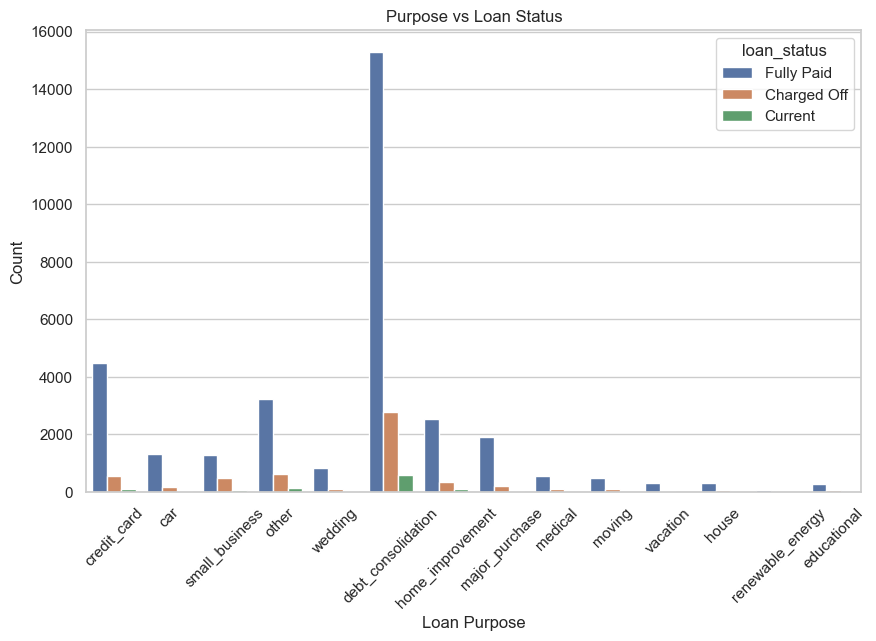

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_combined, x='purpose', hue='loan_status')

plt.title('Purpose vs Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Loan Amount vs Loan Status Insight**
  - **Observation**: Larger loan amounts are more likely to be associated with loan defaults (Charged Off). Borrowers with smaller loan amounts tend to have higher rates of being fully paid.
  - **Insight**: Higher loan amounts can indicate a greater financial burden, increasing the likelihood of default, as larger loans are harder to repay. It suggests that customers with large loans could be at a higher risk of default.

